In [92]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [93]:
import pandas_datareader
print(pandas_datareader.__version__)

0.8.1


In [94]:
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'Symantec': 'SYMC',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Mitsubishi': 'MSBHY',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])
# print(companies)

data_source = 'yahoo'

start_date = '2011-01-31'
end_date = '2020-01-31'

panel_data = data.DataReader(list(companies_dict.values()) , data_source, start_date, end_date)



/home/amanmehta/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'SYMC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [95]:
c = [v for k,v in list(panel_data.columns[panel_data.isnull().any()])]
print(set(c))

{'SYMC'}


In [96]:
for val in companies:
    k,v = val
    if v in c:
        print(val)
        companies.remove(val)
print(companies)

('Symantec', 'SYMC')
[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [97]:
for attr in panel_data:
    k,v = attr
    if v in c:
        del panel_data[attr]

# Other way
# panel_data = panel_data.dropna(axis=1,how='all')
# print(panel_data)

In [98]:
stock_close = panel_data['Close']
stock_open = panel_data['Open']
print(stock_close.iloc[0])
print(stock_open.iloc[0])

Symbols
AMZN     169.639999
AAPL      48.474285
WBA       40.439999
NOC       62.612549
BA        69.480003
LMT       79.599998
MCD       73.669998
INTC      21.459999
NAV       64.849998
IBM      162.000000
TXN       33.910000
MA        23.650999
MSFT      27.730000
GE        19.365385
AXP       43.380001
PEP       64.309998
KO        31.424999
JNJ       59.770000
TM        82.180000
HMC       43.540001
MSBHY     55.849998
SNE       34.340000
XOM       80.680000
CVX       94.930000
VLO       23.180986
F         15.950000
BAC       13.730000
Name: 2011-01-31 00:00:00, dtype: float64
Symbols
AMZN     170.160004
AAPL      47.971428
WBA       40.750000
NOC       61.447037
BA        69.260002
LMT       78.879997
MCD       73.800003
INTC      21.549999
NAV       63.759998
IBM      159.179993
TXN       34.020000
MA        23.400000
MSFT      27.770000
GE        19.355770
AXP       44.130001
PEP       64.349998
KO        31.160000
JNJ       60.160000
TM        82.199997
HMC       42.290001
MS

In [99]:
# Calculate daily stock movement

# Converting to row major 
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])


In [100]:
for i in range(0, row):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -546.1694488525391
Company: Amazon, Change: 83.53851318359375
Company: American Express, Change: 20.05995750427246
Company: Boeing, Change: 99.96769714355469
Company: Bank of America, Change: 133.84984588623047
Company: Chevron, Change: 94.77030181884766
Company: Ford, Change: 52.17005157470703
Company: General Electrics, Change: 55.47998237609863
Company: Honda, Change: -67.71993112564087
Company: IBM, Change: 79.20996856689453
Company: Intel, Change: 66.65985488891602
Company: Johnson & Johnson, Change: 89.73583602905273
Company: Coca Cola, Change: 33.11992835998535
Company: Lockheed Martin, Change: -8.83535623550415
Company: MasterCard, Change: 33.09017562866211
Company: McDonalds, Change: 73.5902099609375
Company: Mitsubishi, Change: 28.25995445251465
Company: Microsoft, Change: 54.99989318847656
Company: Navistar, Change: -10.549999237060547
Company: Northrop Grumman, Change: -10.590059280395508
Company: Pepsi, Change: 33.97012138366699
Company: Sony, Chang

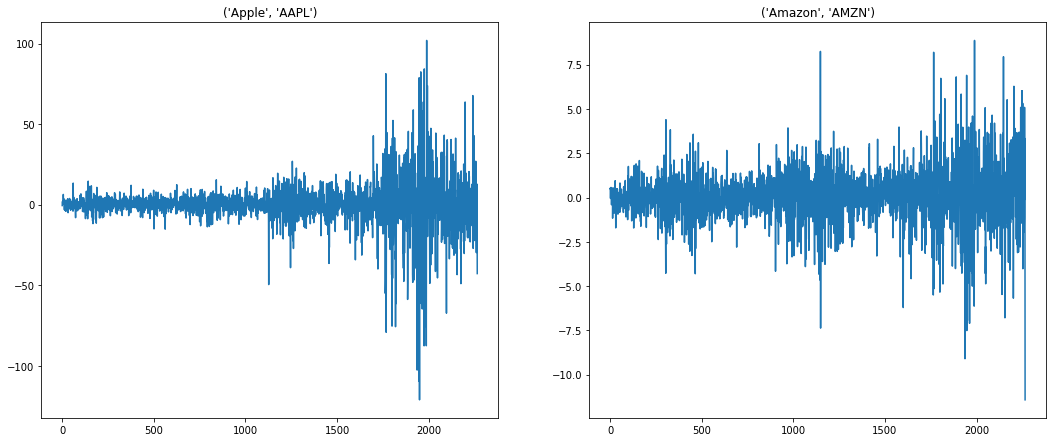

In [101]:
plt.clf
plt.figure(figsize = (18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [102]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.22583077699037304
-0.2634195997306897
0.00019638205043269593


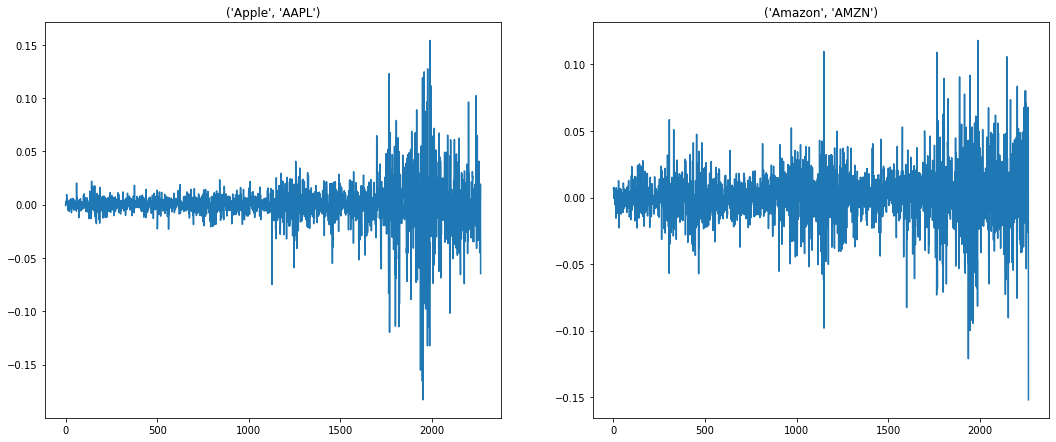

In [103]:
plt.clf
plt.figure(figsize = (18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [109]:
# Create a KMeans model with 8 clusters
kmeans = KMeans(n_clusters=8, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

pipeline.fit(movements)

# Inertia tells how close each cluster is. Low inertia means better clustering.
print(kmeans.inertia_)

9.579884480436485


In [110]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
13       0    (Lockheed Martin, LMT)
20       0              (Pepsi, PEP)
19       0   (Northrop Grumman, NOC)
18       0           (Navistar, NAV)
25       0           (Walgreen, WBA)
8        0              (Honda, HMC)
9        0                (IBM, IBM)
21       1               (Sony, SNE)
12       1           (Coca Cola, KO)
11       1  (Johnson & Johnson, JNJ)
0        1             (Apple, AAPL)
7        1   (General Electrics, GE)
1        1            (Amazon, AMZN)
10       1             (Intel, INTC)
24       2      (Valero Energy, VLO)
22       3              (Toyota, TM)
23       3  (Texas Instruments, TXN)
5        4            (Chevron, CVX)
4        4    (Bank of America, BAC)
3        4              (Boeing, BA)
6        5                 (Ford, F)
15       5          (McDonalds, MCD)
16       5       (Mitsubishi, MSBHY)
17       5         (Microsoft, MSFT)
14       6          (MasterCard, MA)
26       6              (Exxon, XOM)
2

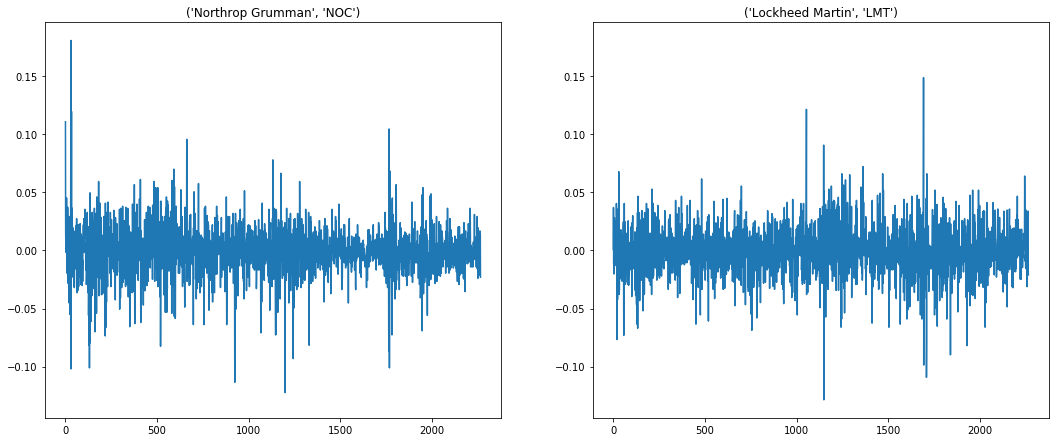

In [111]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[19][:])
plt.title(companies[19])

plt.subplot(222, sharey=ax1)
plt.plot(new[13][:])
plt.title(companies[13])
plt.show()

    labels                 companies
0        0             (Apple, AAPL)
12       0           (Coca Cola, KO)
11       0  (Johnson & Johnson, JNJ)
23       1  (Texas Instruments, TXN)
22       1              (Toyota, TM)
19       1   (Northrop Grumman, NOC)
25       1           (Walgreen, WBA)
9        1                (IBM, IBM)
13       1    (Lockheed Martin, LMT)
15       2          (McDonalds, MCD)
16       2       (Mitsubishi, MSBHY)
14       3          (MasterCard, MA)
2        3   (American Express, AXP)
5        4            (Chevron, CVX)
3        4              (Boeing, BA)
7        5   (General Electrics, GE)
10       5             (Intel, INTC)
4        5    (Bank of America, BAC)
1        5            (Amazon, AMZN)
21       5               (Sony, SNE)
24       6      (Valero Energy, VLO)
26       6              (Exxon, XOM)
18       6           (Navistar, NAV)
8        6              (Honda, HMC)
20       6              (Pepsi, PEP)
6        7                 (Ford, F)
1

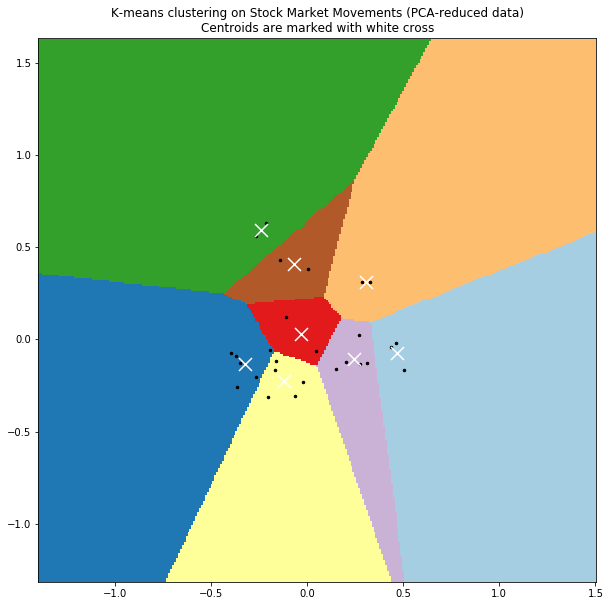

In [112]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
